<a href="https://colab.research.google.com/github/ansimhyang60/Project/blob/main/%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%ED%9A%9F%EC%88%98_%EC%98%88%EC%B8%A1_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# count 대여횟수 ====> 종속 변수 (casual+registerd)

# 컬럼 정보
- temp(온도(섭씨), atemp(체감온도), humidity(상대습도), windspeed(풍속), count
- season 1234(봄,여름,가을,겨울), holyday 1휴일, 0주말, workingday 1주중, 0주말, weather 1 맑음, 2안개(흐림), 3눈, 4 심한 눈,비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
#그래프가 출려되지 않은 오류를 대처하기 위한 코드

plt.style.use('ggplot')#그래프에서 범위를 격자로 보기

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/인공지능 자연어처리 및 음성인식 음성합성 기술을 활용한 응용 SW 개발자 양성과정 /1.머신러닝/workspace/bike.csv')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.info() #컬럼 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train['datetime']=pd.to_datetime(train['datetime']) #datetime이 object라서 타입 변경
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.info() #변경된 거 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
datetime=train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
train['year']=datetime.dt.year
train['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [ ]:
train['month']=datetime.dt.month
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [ ]:
train['day']=datetime.dt.day
train['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [ ]:
train['hour']=datetime.dt.hour
train['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [ ]:
train['minute']=datetime.dt.minute
train['minute'].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [ ]:
train['second']=datetime.dt.second
train['second'].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: int64

In [ ]:
train.head() #conunt 종속변수라서 각각 비교하기

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [ ]:
train['count'].mean()

191.57413191254824

In [ ]:
train.groupby(["year"])

In [ ]:
train.groupby(['year']).mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,minute,second
year,,,,,,,,,,,,,,,,
2011,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.73792,115.485430,144.223349,6.538547,9.982663,11.571007,0.0,0.0
2012,2.501281,0.030564,0.679722,1.410505,20.706051,24.149254,60.379575,12.675605,43.25000,195.310944,238.560944,6.504575,10.002379,11.512445,0.0,0.0


In [ ]:
train.groupby(['year']).mean()[['count']] #연도별 사용횟수의 평균

,count
year,
2011,144.223349
2012,238.560944


In [ ]:
train.groupby(['month']).mean()[['count']] #연도별 사용횟수의 평균

,count
month,
1,90.366516
2,110.003330
3,148.169811
4,184.160616
5,219.459430
6,242.031798
7,235.325658
8,234.118421
9,233.805281


In [ ]:
train.groupby(['hour']).mean()[['count']] #연도별 사용횟수의 평균

,count
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240
5,19.767699
6,76.259341
7,213.116484
8,362.769231


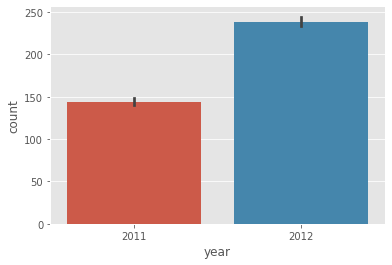

In [ ]:
sns.barplot(data=train, x='year', y='count')

In [ ]:
train.groupby(['year']).mean()[['count']] #연도별 사용횟수의 평균

,count
year,
2011,144.223349
2012,238.560944


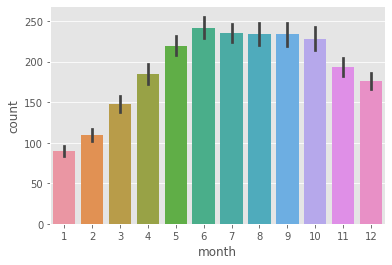

In [ ]:
sns.barplot(data=train, x='month', y='count')

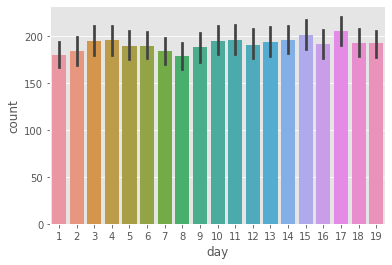

In [ ]:
sns.barplot(data=train, x='day', y='count')

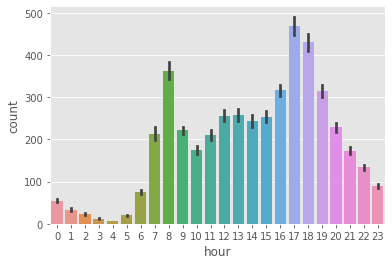

In [ ]:
sns.barplot(data=train, x='hour', y='count')

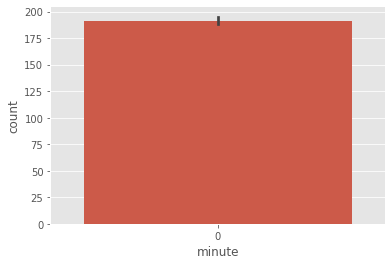

In [ ]:
sns.barplot(data=train, x='minute', y='count') #데이터가 0임 ===> 삭제하기

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [ ]:
train['day of week']=datetime.dt.dayofweek
train['day of week'].head()

0    5
1    5
2    5
3    5
4    5
Name: day of week, dtype: int64

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


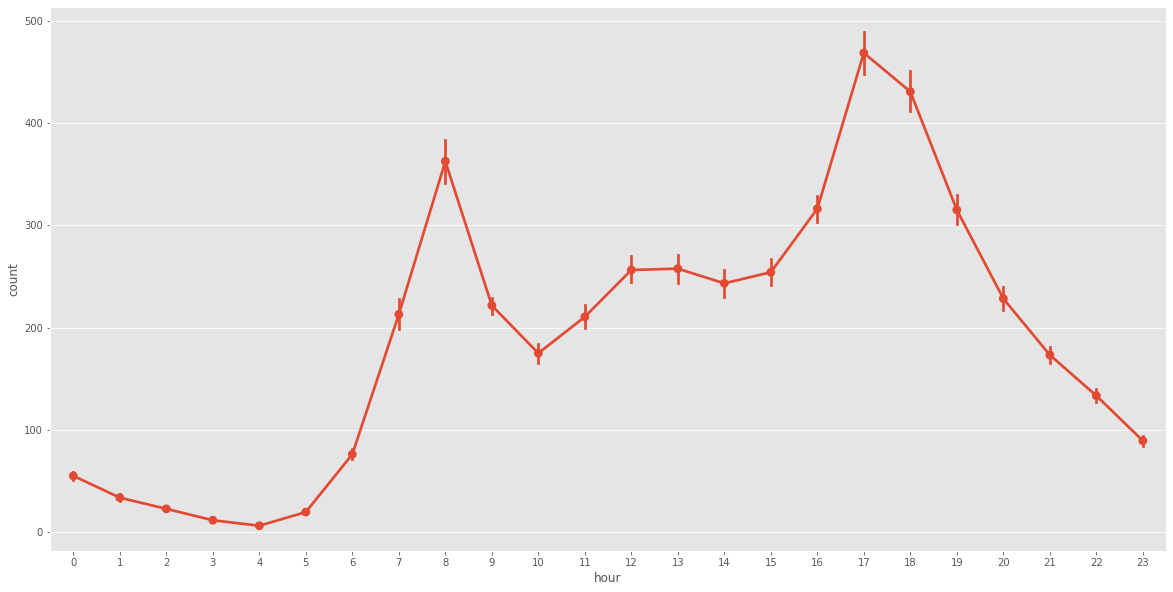

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=train, x = 'hour', y = 'count')

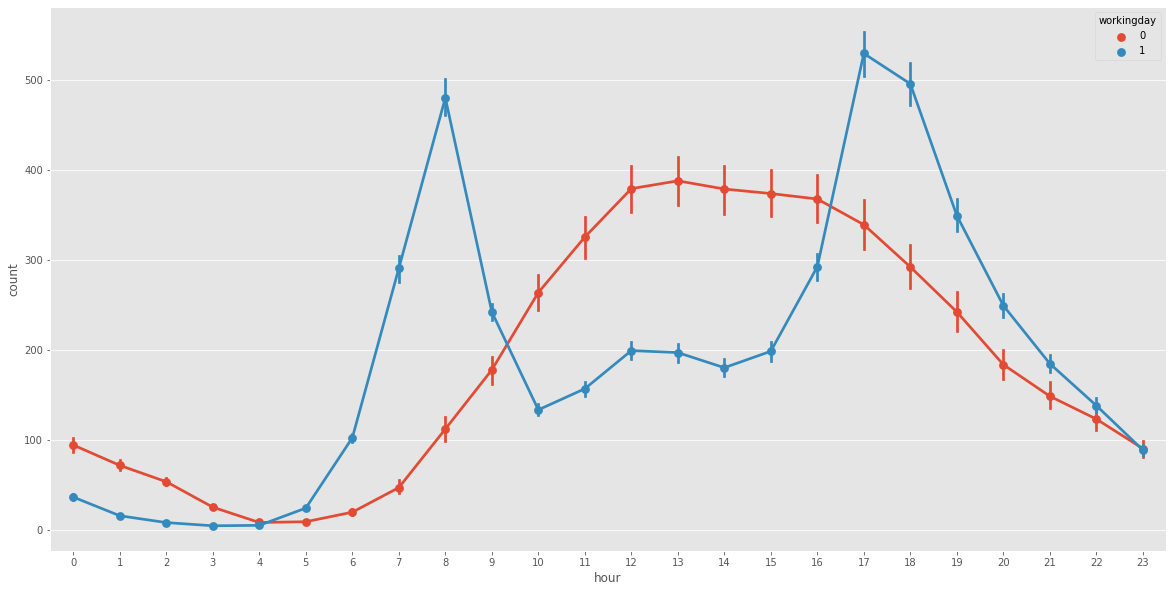

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=train, x = 'hour', y = 'count', hue='workingday')

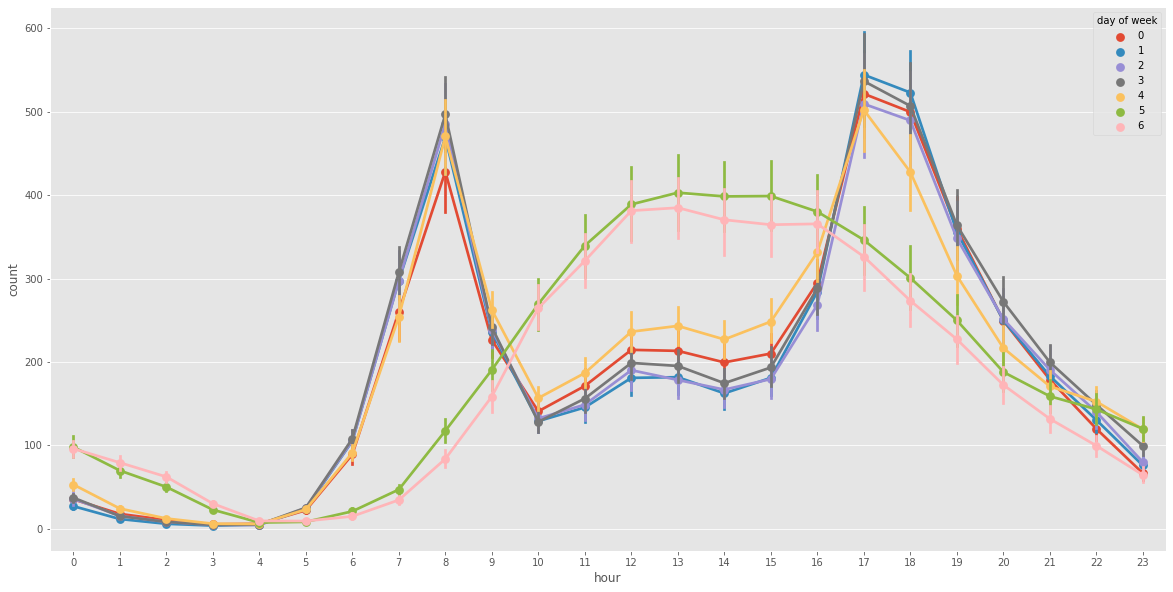

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=train, x = 'hour', y = 'count', hue='day of week')  #0~4까지 평일 ,5~6 은 주말

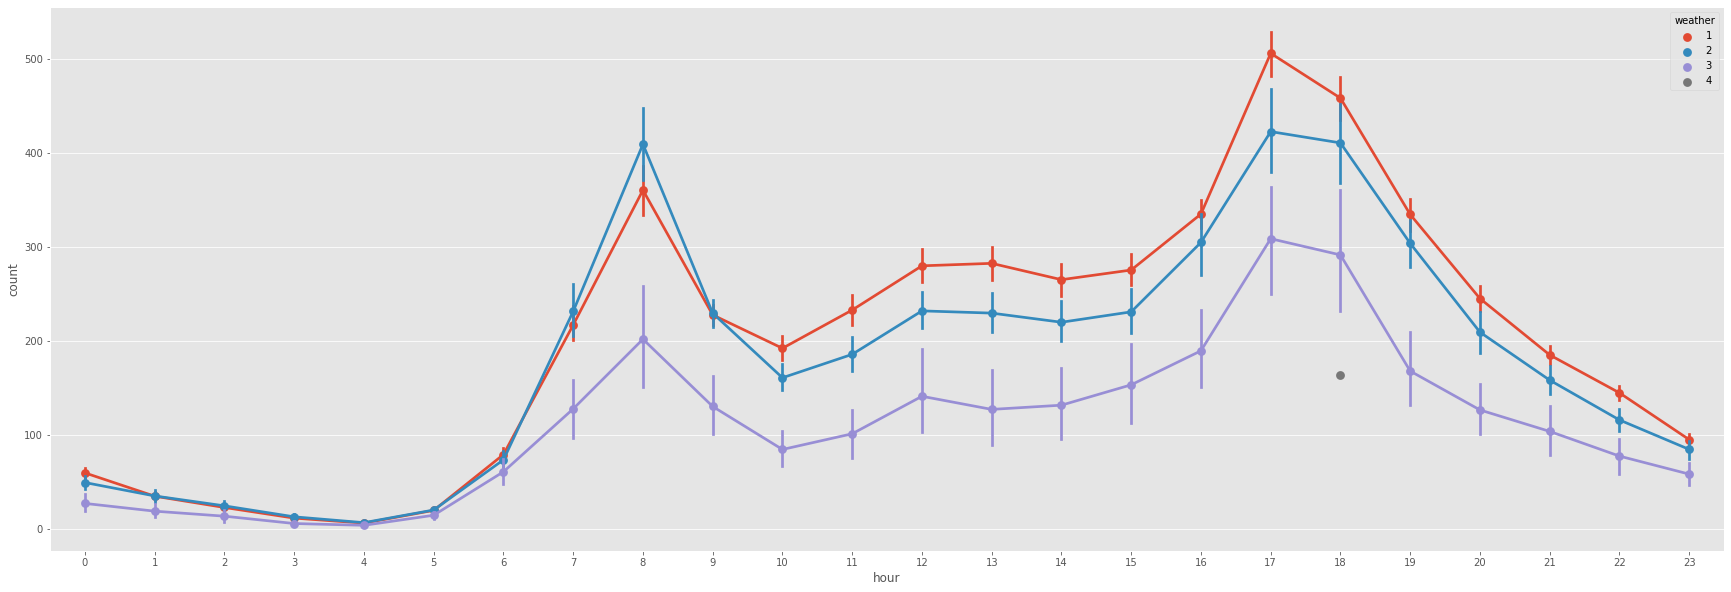

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=train, x='hour', y='count', hue='weather')

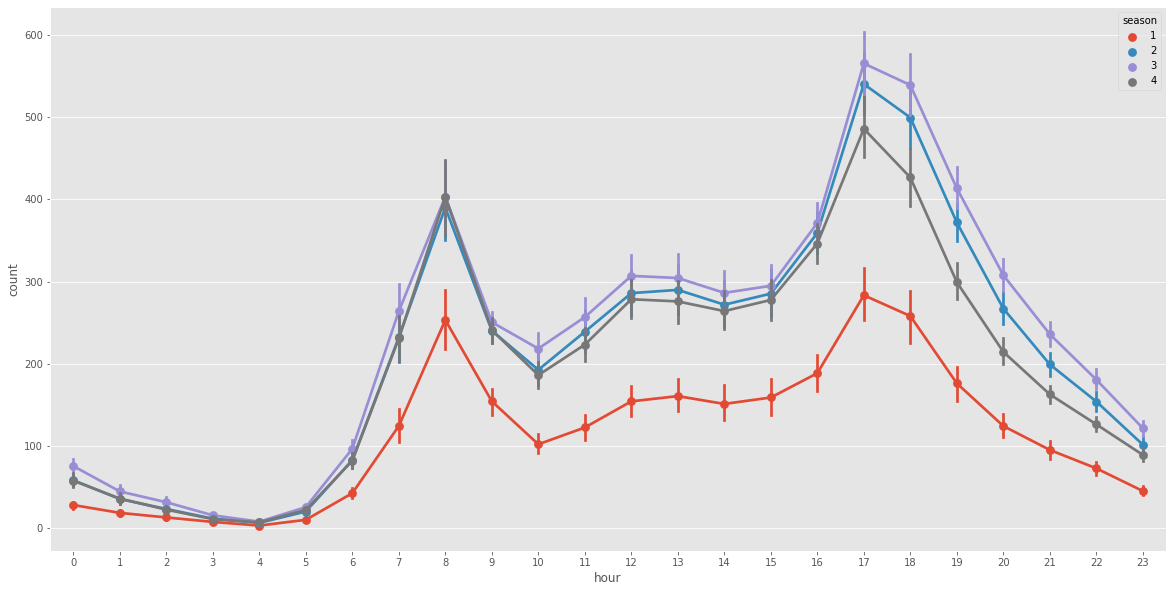

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=train, x = 'hour', y = 'count', hue='season')

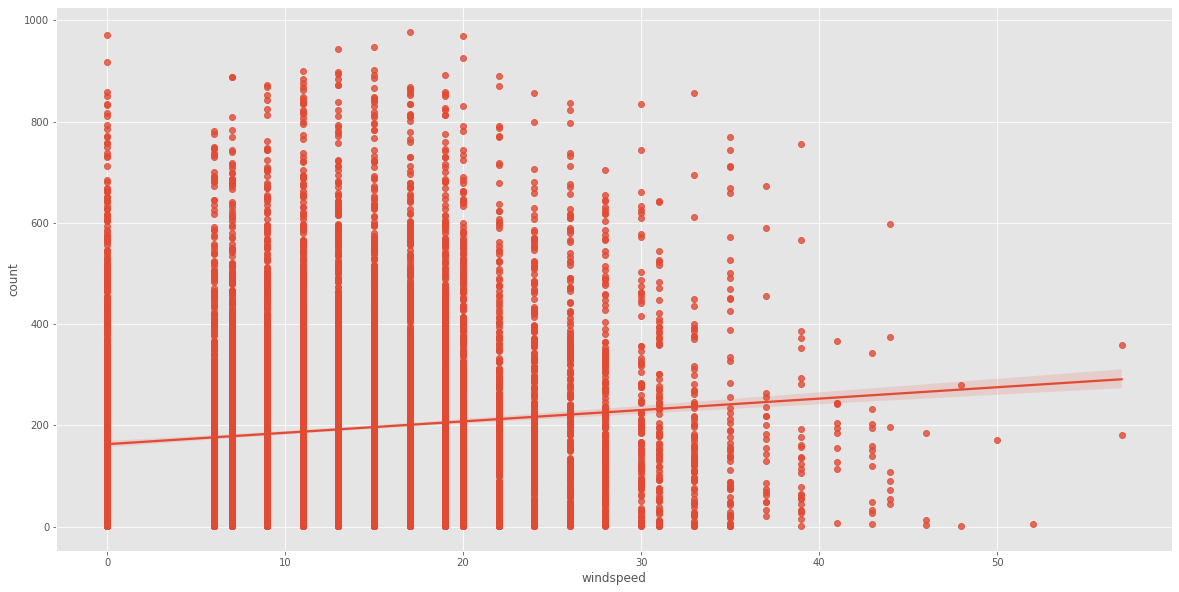

In [ ]:
plt.figure(figsize=(20,10))
sns.regplot(data=train, x = 'windspeed', y = 'count') #windspeed 풍속

# 상관관계 분석

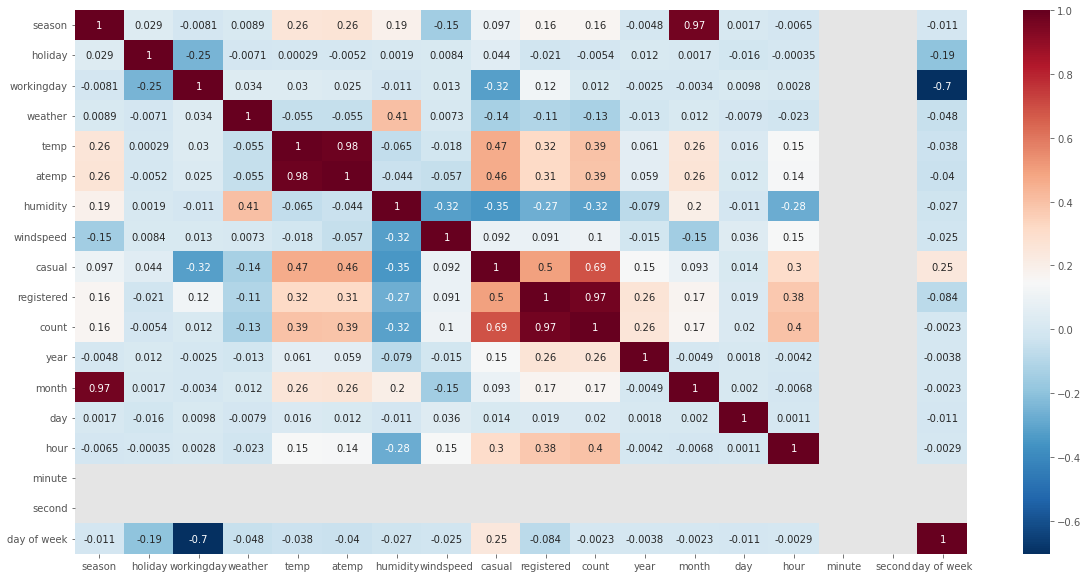

In [ ]:
fig, ax=plt.subplots() #히트맵, annot=true 컬럼명 출력
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r')  #각각의 공간에 숫자를 넣는 것을 annot=Ture

# 회귀분석 성능 측정
- (찐-예측)^2 의 합/데이터 수

In [ ]:
y=train['count'] #종속변수
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
X=train.copy() #독립변수
#train 데이터를 X에 복사
X.pop('count') #X에서 count 컬럼 삭제
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,day of week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,0,5


In [ ]:
X.pop('registered')
X.pop('datetime')
X.pop('casual')
X.pop('day')
X.pop('minute')
X.pop('second')

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: second, Length: 10886, dtype: int64

In [ ]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,day of week
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5


In [ ]:
from sklearn.model_selection import train_test_split #모델 만들 때 비율: 0.2(독립변수 80%, 20%), 종속변수(80%, 20%)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
# RandomForestRegressor: RandomForest 알고리즘을 이용해서 값을 예측(회귀)
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(
    random_state=0 #같은 값을 설정하면 다음에 실행할 때 같으 값을 선택
)

In [ ]:
rf_model # RandomForestRegressor 랜덤포레스트 알고리즘을 이용한 예측 회귀 객체 출력

RandomForestRegressor(random_state=0)

In [ ]:
rf_model.fit(X_train,y_train) #fit으로 객체를 만들 때 둘다 train 씀

RandomForestRegressor(random_state=0)

In [ ]:
pred=rf_model.predict(X_test) #예측 데이터 객체를 만들 땐 test 씀
pred

array([ 33.95, 547.64,  89.25, ..., 318.19, 143.25, 330.48])

In [ ]:
from sklearn.metrics import mean_squared_error #성능 측정 지표 (잔차 제곱의 합을 계산)
print('MSE', mean_squared_error(y_test, pred)) #찐 값과 예측값 계산

MSE 1508.207127363649


# 이상값 조회

In [ ]:
q1=np.percentile(train['count'], 25) #count 컬럼에서 25%에 해당하는 데이터 조회
q1

42.0

In [ ]:
q3=np.percentile(train['count'], 75) #count 컬럼에서 75%에 해당하는 데이터 조회
q3

284.0

In [ ]:
IQR=q3-q1
IQR

242.0

In [ ]:
#95% 신뢰구간 이상치인데 우린 이상치가 아닌 데이터만 출력
trainwithoutOutliers = \
    train[(train['count']>=q1-(1.5*IQR)) & (train['count']<=(q3+1.5*IQR))]
trainwithoutOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [ ]:
# 이상치 데이터만 출력
trainOutliers = \
   train[(train['count']<q1-(1.5*IQR)) | (train['count']>(q3+1.5*IQR))]
trainOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,2012,3,12,18,0,0,0
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,2012,3,13,17,0,0,1
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,2012,3,13,18,0,0,1
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,2012,3,14,8,0,0,2
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,2012,12,11,8,0,0,1
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,2012,12,12,8,0,0,2
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,2012,12,13,8,0,0,3
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,12,18,8,0,0,1


In [ ]:
train=trainwithoutOutliers.copy() #300개의 인덱스가 비어있음(10585인데 마지막인덱스는 10885)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [ ]:
train.iloc[6610:6615, :] #보고싶은 행만 ==> iloc       , 6611이 없음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,0,0
6612,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,0,0
6613,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,0,0
6614,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,0,0
6615,2012-03-12 22:00:00,1,0,1,2,22.96,26.515,56,15.0013,17,116,133,2012,3,12,22,0,0,0


In [ ]:
train.index=range(len(train)) #인덱스 다시 설정
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [ ]:
train.iloc[6610:6615, :] #보고싶은 행만 ==> iloc       , 6611이 잘들어가 있음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,0,0
6611,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,0,0
6612,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,0,0
6613,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,0,0
6614,2012-03-12 22:00:00,1,0,1,2,22.96,26.515,56,15.0013,17,116,133,2012,3,12,22,0,0,0


# 데이터 정규화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


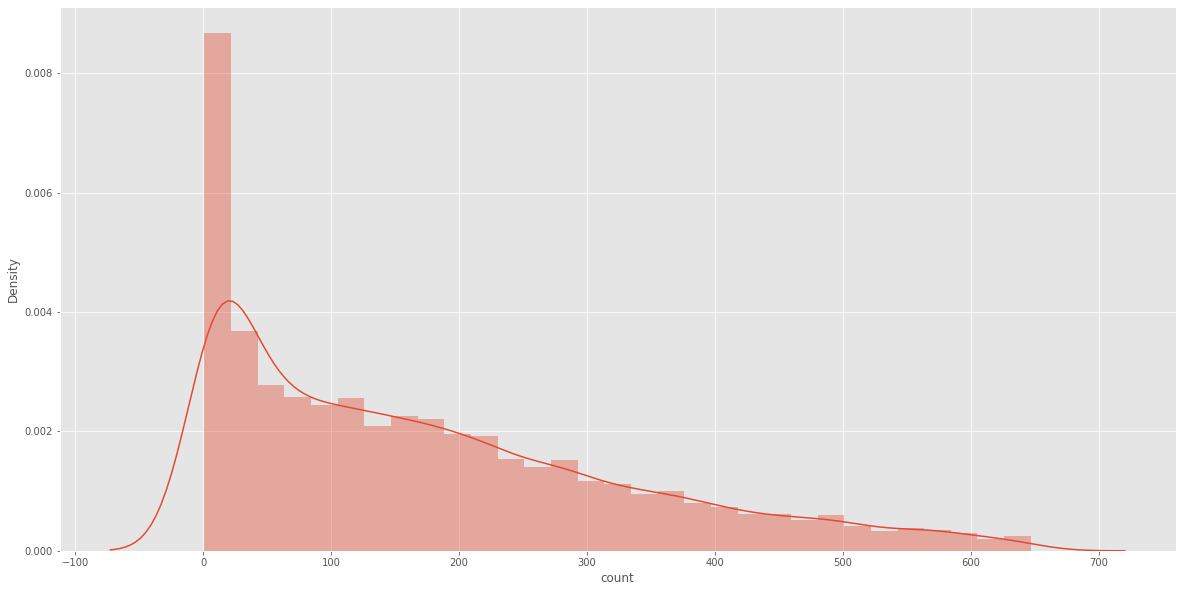

In [ ]:
plt.figure(figsize=(20,10)) #확률밀도: 데이터를 많이 모으면 저런 모양이니까 데이터를 모아라
sns.distplot(train['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


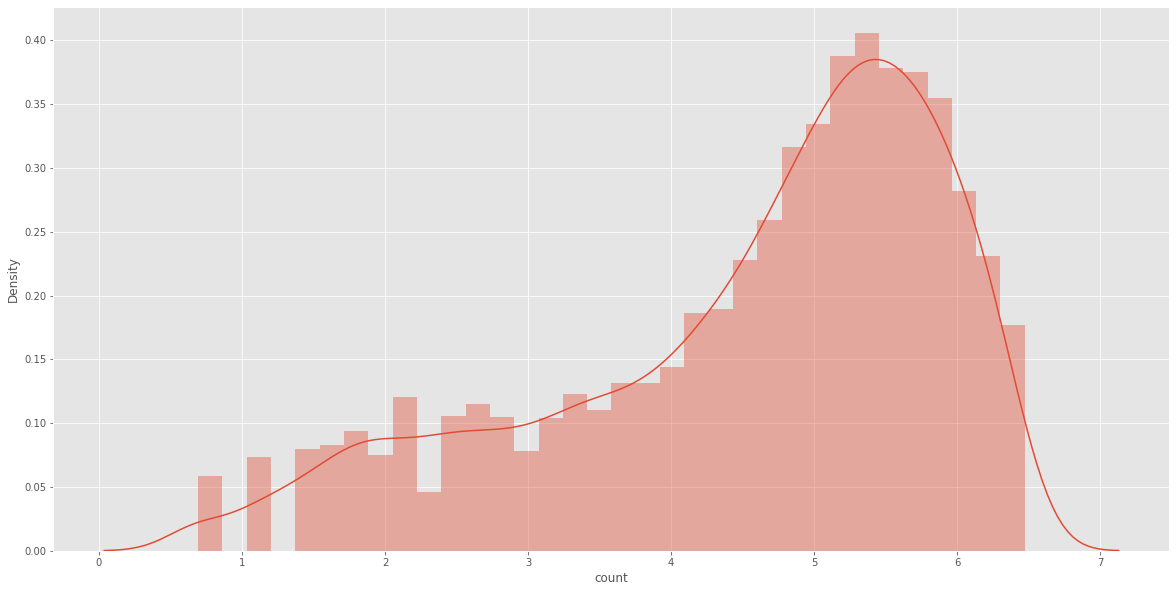

In [ ]:
#로그값을 계산
train['count']=np.log1p(train['count']) #count+1 ===> log1p
plt.figure(figsize=(20,10))
sns.distplot(train['count'])

# 회귀분석

In [ ]:
y= train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [ ]:
X=train.copy()
X.pop('count')
X.head

<bound method NDFrame.head of                  datetime  season  holiday  ...  minute  second  day of week
0     2011-01-01 00:00:00       1        0  ...       0       0            5
1     2011-01-01 01:00:00       1        0  ...       0       0            5
2     2011-01-01 02:00:00       1        0  ...       0       0            5
3     2011-01-01 03:00:00       1        0  ...       0       0            5
4     2011-01-01 04:00:00       1        0  ...       0       0            5
...                   ...     ...      ...  ...     ...     ...          ...
10581 2012-12-19 19:00:00       4        0  ...       0       0            2
10582 2012-12-19 20:00:00       4        0  ...       0       0            2
10583 2012-12-19 21:00:00       4        0  ...       0       0            2
10584 2012-12-19 22:00:00       4        0  ...       0       0            2
10585 2012-12-19 23:00:00       4        0  ...       0       0            2

[10586 rows x 18 columns]>

In [ ]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10581   2012-12-19 19:00:00
10582   2012-12-19 20:00:00
10583   2012-12-19 21:00:00
10584   2012-12-19 22:00:00
10585   2012-12-19 23:00:00
Name: datetime, Length: 10586, dtype: datetime64[ns]

In [ ]:
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')
X.pop('second')

0        0
1        0
2        0
3        0
4        0
        ..
10581    0
10582    0
10583    0
10584    0
10585    0
Name: second, Length: 10586, dtype: int64

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=156)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


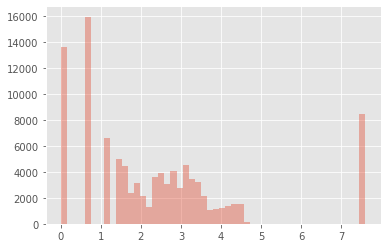

In [ ]:
sns.distplot(np.log1p(X_train), kde = False) #확률밀도 라인? 삭제 kde=False

# 랜덤포레스트 예측 회귀

In [ ]:
rf_model=RandomForestRegressor(
    random_state=0
)

In [ ]:
rf_model

RandomForestRegressor(random_state=0)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
pred=rf_model.predict(X_test)

In [ ]:
pred

array([5.22521988, 6.35009589, 5.02216584, ..., 4.61489246, 4.26156294,
       4.92807568])

In [ ]:
print("MSE:", mean_squared_error(y_test, pred))

MSE: 0.09544071772145922


# 결측치 처리

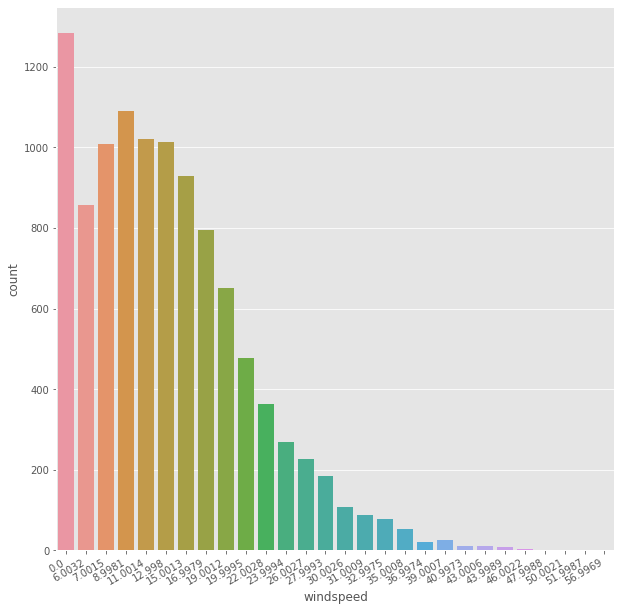

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=30, ha='right')
sns.countplot(data=train, x='windspeed')

In [ ]:
trainWind0=train[train['windspeed']==0]

In [ ]:
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,2012-12-17 09:00:00,4,0,1,2,16.40,20.455,87,0.0,11,271,5.645447,2012,12,17,9,0,0,0
10528,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,5.451038,2012,12,17,12,0,0,0
10531,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,5.356586,2012,12,17,15,0,0,0
10561,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,4.890349,2012,12,18,22,0,0,1


In [ ]:
trainWindNot0=train[train['windspeed']!=0]
trainWindNot0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,0.693147,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,3.610918,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,4.043051,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,4.442651,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,4.553877,2011,1,1,13,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2


In [ ]:
trainWindNot0['windspeed'].mean()

14.541892215891192

In [ ]:
X_train.copy()
X[X["windspeed"]==0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,day of week
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10525,4,0,1,2,16.40,20.455,87,0.0,2012,12,9,0
10528,4,0,1,2,16.40,20.455,87,0.0,2012,12,12,0
10531,4,0,1,2,17.22,21.210,88,0.0,2012,12,15,0
10561,4,0,1,1,13.94,16.665,49,0.0,2012,12,22,1


In [ ]:
X.loc[X['windspeed']==0, 'windspeed'] = trainWindNot0['windspeed'].mean() #풍속이 0인 곳에만 풍속의 평균값을 넣음
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,day of week
0,1,0,0,1,9.84,14.395,81,14.541892,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,14.541892,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,14.541892,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,14.541892,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,14.541892,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,2
10582,4,0,1,1,14.76,17.425,57,15.001300,2012,12,20,2
10583,4,0,1,1,13.94,15.910,61,15.001300,2012,12,21,2
10584,4,0,1,1,13.94,17.425,61,6.003200,2012,12,22,2


# 컬럼추가(peak)
- workingday ==1 근무일
- workingday==0 공휴일

In [ ]:
train['peak']=0
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,0,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,0,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,0,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,0,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0


In [ ]:
for index in range(len(train)):
  workingday=train.loc[index, 'workingday']
  hour=train.loc[index,'hour']
  print('index', index)
  print('workingday', workingday)
  print('hour', hour)
  print('='* 100)

  if workingday == 1:
    if hour == 8 or (17<=hour<=18):
      train.loc[index, 'peak']=1
  else:
    if 10<=hour<=19:
      train.loc[index, 'peak']=1


Streaming output truncated to the last 5000 lines.
index 9336
workingday 1
hour 4
index 9337
workingday 1
hour 5
index 9338
workingday 1
hour 6
index 9339
workingday 1
hour 7
index 9340
workingday 1
hour 9
index 9341
workingday 1
hour 10
index 9342
workingday 1
hour 11
index 9343
workingday 1
hour 12
index 9344
workingday 1
hour 13
index 9345
workingday 1
hour 14
index 9346
workingday 1
hour 15
index 9347
workingday 1
hour 16
index 9348
workingday 1
hour 19
index 9349
workingday 1
hour 20
index 9350
workingday 1
hour 21
index 9351
workingday 1
hour 22
index 9352
workingday 1
hour 23
index 9353
workingday 1
hour 0
index 9354
workingday 1
hour 1
index 9355
workingday 1
hour 2
index 9356
workingday 1
hour 3
index 9357
workingday 1
hour 4
index 9358
workingday 1
hour 5
index 9359
workingday 1
hour 6
index 9360
workingday 1
hour 7
index 9361
workingday 1
hour 9
index 9362
workingday 1
hour 10
index 9363
workingday 1
hour 11
index 9364
workingday 1
hour 12
index 9365
workingday 1
hour 13
ind

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,0,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,0,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,0,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,0,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0


In [ ]:
train[train['peak']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,3.610918,2011,1,1,10,0,0,5,1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,4.043051,2011,1,1,11,0,0,5,1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,4.442651,2011,1,1,12,0,0,5,1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,4.553877,2011,1,1,13,0,0,5,1
14,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,4.672829,2011,1,1,14,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,2012-12-17 18:00:00,4,0,1,2,16.40,20.455,94,6.0032,14,493,6.230481,2012,12,17,18,0,0,0,1
10556,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,6.350886,2012,12,18,17,0,0,1,1
10557,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,6.265301,2012,12,18,18,0,0,1,1
10579,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,6.333280,2012,12,19,17,0,0,2,1


In [ ]:
train['ideal']=0
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak,ideal
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,0,5,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,0,5,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,0,5,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,0,5,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0,0


In [ ]:
for index in range(len(train)):
  if(train.loc[index, 'temp']>27) & (train.loc[index,'windspeed']<30):
    train.loc[index,'ideal']=1

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak,ideal
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,0,5,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,0,5,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,0,5,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,0,5,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0,0


In [ ]:
train[train['ideal']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak,ideal
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,118,5.257495,2011,2,18,14,0,0,4,0,1
844,2011-02-18 15:00:00,1,0,1,1,27.06,31.060,36,22.0028,55,117,5.153292,2011,2,18,15,0,0,4,0,1
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.0012,68,164,5.451038,2011,2,18,16,0,0,4,0,1
846,2011-02-18 17:00:00,1,0,1,1,27.06,31.060,34,23.9994,52,275,5.793014,2011,2,18,17,0,0,4,1,1
1289,2011-03-18 14:00:00,1,0,1,1,27.06,31.060,39,16.9979,71,103,5.164786,2011,3,18,14,0,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,2012-10-05 15:00:00,4,0,1,1,29.52,32.575,39,16.9979,150,320,6.154858,2012,10,5,15,0,0,4,0,1
9389,2012-10-05 16:00:00,4,0,1,1,29.52,32.575,37,0.0000,153,481,6.453625,2012,10,5,16,0,0,4,0,1
9585,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,249,368,6.426488,2012,10,14,14,0,0,6,1,1
9586,2012-10-14 15:00:00,4,0,0,1,27.06,31.060,39,27.9993,213,355,6.343880,2012,10,14,15,0,0,6,1,1


In [ ]:
train['sticky']=0
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,0,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,0,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,0,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,0,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0,0,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0,0,0


In [ ]:
for index in range(len(train)):
  if(train.loc[index, 'humidity']>60) & (train.loc[index,'workingday']==1):
    train.loc[index,'sticky']=1

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,0,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,0,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,0,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,0,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,0,2,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,0,2,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0,0,1


In [ ]:
train[train['sticky']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day of week,peak,ideal,sticky
66,2011-01-03 21:00:00,1,0,1,1,7.38,9.850,64,8.9981,3,49,3.970292,2011,1,3,21,0,0,0,0,0,1
67,2011-01-03 22:00:00,1,0,1,1,5.74,7.575,69,8.9981,0,20,3.044522,2011,1,3,22,0,0,0,0,0,1
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,0.693147,2011,1,4,2,0,0,1,0,0,1
72,2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,1.098612,2011,1,4,4,0,0,1,0,0,1
73,2011-01-04 05:00:00,1,0,1,1,4.92,7.575,68,7.0015,0,4,1.609438,2011,1,4,5,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,5.762051,2012,12,19,9,0,0,2,0,0,1
10572,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,5.105945,2012,12,19,10,0,0,2,0,0,1
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,0,2,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,0,2,0,0,1


In [ ]:
y=train['count']
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [ ]:
X=train.copy() #count컬럼 삭제
X.pop('count')

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [ ]:
X

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,day of week,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0,0,0,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1,0,0,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2,0,0,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3,0,0,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19,0,0,2,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20,0,0,2,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21,0,0,2,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22,0,0,2,0,0,1


In [ ]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10581   2012-12-19 19:00:00
10582   2012-12-19 20:00:00
10583   2012-12-19 21:00:00
10584   2012-12-19 22:00:00
10585   2012-12-19 23:00:00
Name: datetime, Length: 10586, dtype: datetime64[ns]

In [ ]:
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')
X.pop('second')

0        0
1        0
2        0
3        0
4        0
        ..
10581    0
10582    0
10583    0
10584    0
10585    0
Name: second, Length: 10586, dtype: int64

In [ ]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,day of week,peak,ideal,sticky
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2,0,0,0
10582,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2,0,0,0
10583,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2,0,0,1
10584,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=156)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(
    random_state=0
)

In [ ]:
rf_model

RandomForestRegressor(random_state=0)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
pred=rf_model.predict(X_test) #예측값
pred

array([5.52071446, 6.36945811, 4.8859815 , ..., 4.59956647, 4.2659568 ,
       4.9169611 ])

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE', mean_squared_error(y_test, pred))

MSE 0.09160522823294627


In [ ]:
rf_model.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=209652396)

In [ ]:
# import pydotplus

In [ ]:
# from sklearn import tree

In [ ]:
# dt_dot_data=tree.export_graphviz(
#     rf_model.estimators_[0],
#     feature_names=X.columns,
#     special_characters=True,
#     filled=True,
#     rounded=True
# )

In [ ]:
# dt_dot_data

In [ ]:
# dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)

In [ ]:
# dt_graph

In [ ]:
# dt_graph.write_pdf('bike01.pdf')

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb=XGBRegressor(
    n_estimators=150,
    max_depth=5,
    random_state=0,
    min_child_weight=7,
    learning_rate=0.1
)

In [ ]:
model_xgb.fit(X_train, y_train)

[05:59:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, min_child_weight=7, n_estimators=150)

In [ ]:
pred=model_xgb.predict(X_test)
pred

array([5.2614074, 6.388658 , 4.9423127, ..., 4.5871344, 4.3173847,
       4.9532294], dtype=float32)

In [ ]:
print('MSE', mean_squared_error(pred, y_test))

MSE 0.07954386619645547


In [ ]:
model_xgb=XGBRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=0,
    min_child_weight=7,
    learning_rate=0.2
)

In [ ]:
model_xgb.fit(X_train, y_train)

[05:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=5, min_child_weight=7,
             n_estimators=200)

In [ ]:
pred=model_xgb.predict(X_test)
pred

array([5.285174 , 6.452567 , 4.9958034, ..., 4.527295 , 4.3123245,
       4.963163 ], dtype=float32)

In [ ]:
print('MSE', mean_squared_error(pred, y_test))

MSE 0.07601009709685805


In [ ]:
model_xgb=XGBRegressor(
    n_estimators=268,
    max_depth=5,
    random_state=0,
    min_child_weight=7,
    learning_rate=0.1
)

In [ ]:
model_xgb.fit(X_train, y_train)

[06:07:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, min_child_weight=7, n_estimators=268)

In [ ]:
pred=model_xgb.predict(X_test)
pred

array([5.2020097, 6.414822 , 4.9193954, ..., 4.5103674, 4.3242283,
       4.9355884], dtype=float32)

In [ ]:
print("MSE", mean_squared_error(pred, y_test))

MSE 0.0755053745009018
